# **Personalized Embryo Implantation Predictor **

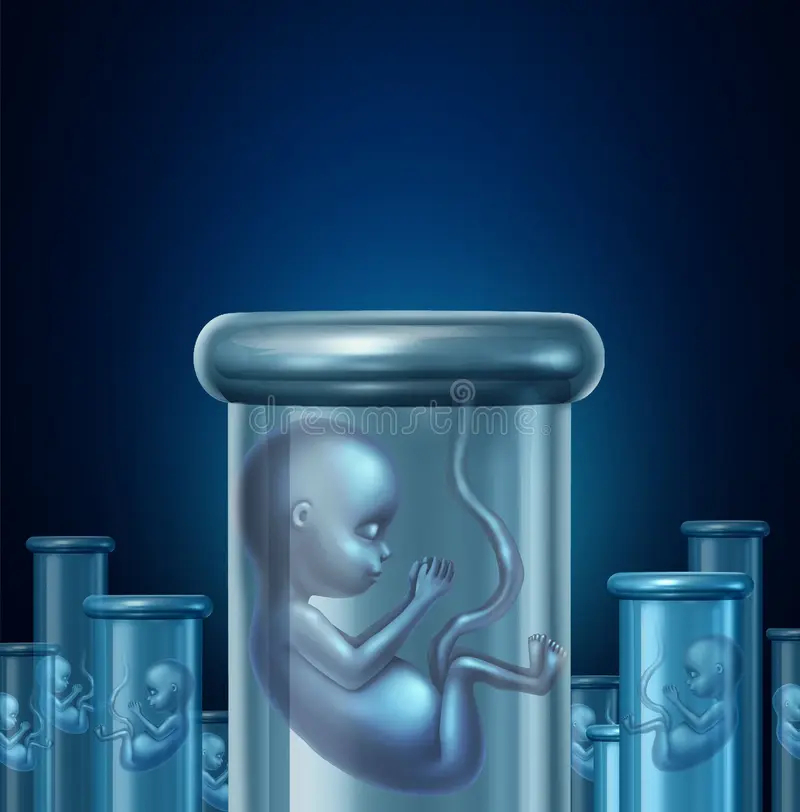

Problem Statement
Predicting the success of embryo implantation in IVF cycles remains a complex challenge due to the multifactorial nature of reproductive biology. Current predictive models are predominantly focused on embryo image analysis using deep learning, which:
* Do not generalize well across different IVF clinics due to variability in imaging and protocols.
* Lack personalization by ignoring patient-specific variables such as hormone levels, uterine conditions, and timing.
* Offer poor interpretability, making it difficult for clinicians to understand or trust predictions.



In [ ]:
import pandas as pd
import numpy as np

# Seed and sample size
np.random.seed(42)
n_samples = 1200

# Create synthetic IVF dataset
df = pd.DataFrame({
    'Age': np.random.randint(22, 42, size=n_samples),
    'BMI': np.round(np.random.normal(24, 3, size=n_samples), 1),
    'FSH': np.round(np.random.uniform(3, 12, size=n_samples), 2),
    'LH': np.round(np.random.uniform(2, 10, size=n_samples), 2),
    'E2': np.round(np.random.uniform(100, 4000, size=n_samples), 1),
    'P4': np.round(np.random.uniform(0.5, 20, size=n_samples), 2),
    'Embryo_Grade': np.random.choice(['3AA', '4AB', '4BB', '5AA', '3BB'], size=n_samples),
    'Day_of_Development': np.random.choice(['D5', 'D6'], size=n_samples),
    'Endometrial_Thickness_mm': np.round(np.random.uniform(6.0, 12.5, size=n_samples), 1),
    'Blood_Flow_Score': np.random.choice(['Poor', 'Fair', 'Good'], size=n_samples),
    'Days_Since_Progesterone_Start': np.random.randint(3, 7, size=n_samples)
})

# Derived features
df['E2/FSH'] = np.round(df['E2'] / df['FSH'], 2)
df['P4/E2'] = np.round(df['P4'] / df['E2'], 4)

# Generate synthetic target
prob = (
    (df['Age'] < 35).astype(int) * 0.3 +
    (df['Endometrial_Thickness_mm'] > 8.0).astype(int) * 0.3 +
    (df['Blood_Flow_Score'] == 'Good').astype(int) * 0.2 +
    (df['Embryo_Grade'].isin(['4AB', '5AA'])).astype(int) * 0.2
)

df['Implantation_Success'] = (np.random.rand(n_samples) < prob).astype(int)

# Save to Excel
df.to_excel("implantIQ_synthetic_dataset.xlsx", index=False)

print("✅ Excel file generated successfully: implantIQ_synthetic_dataset.xlsx")


✅ Excel file generated successfully: implantIQ_synthetic_dataset.xlsx


In [ ]:
import pandas as pd
df = pd.read_excel("implantIQ_synthetic_dataset.xlsx")
df


,Age,BMI,FSH,LH,E2,P4,Embryo_Grade,Day_of_Development,Endometrial_Thickness_mm,Blood_Flow_Score,Days_Since_Progesterone_Start,E2/FSH,P4/E2,Implantation_Success
0,28,18.7,5.51,9.43,1102.5,15.84,4BB,D6,12.5,Fair,6,200.09,0.0144,1
1,41,27.4,4.90,2.49,1913.6,10.44,4AB,D6,8.7,Poor,3,390.53,0.0055,1
2,36,20.0,11.62,2.74,985.2,6.35,3BB,D5,10.0,Fair,4,84.78,0.0064,0
3,32,23.3,3.08,3.30,3001.2,3.45,4AB,D6,6.7,Fair,6,974.42,0.0011,0
4,29,27.2,11.98,6.76,3684.9,6.05,4BB,D5,9.0,Fair,5,307.59,0.0016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,26,27.3,6.09,9.62,302.9,5.30,4AB,D5,11.8,Good,6,49.74,0.0175,1
1196,33,22.8,10.51,7.90,543.2,10.88,5AA,D6,10.5,Fair,5,51.68,0.0200,1
1197,33,21.8,11.42,6.78,115.3,9.91,5AA,D6,9.0,Fair,6,10.10,0.0859,1
1198,40,27.4,4.67,9.05,3997.9,14.21,3AA,D6,9.3,Poor,6,856.08,0.0036,0


In [ ]:
df.tail()

,Age,BMI,FSH,LH,E2,P4,Embryo_Grade,Day_of_Development,Endometrial_Thickness_mm,Blood_Flow_Score,Days_Since_Progesterone_Start,E2/FSH,P4/E2,Implantation_Success
1195,26,27.3,6.09,9.62,302.9,5.30,4AB,D5,11.8,Good,6,49.74,0.0175,1
1196,33,22.8,10.51,7.90,543.2,10.88,5AA,D6,10.5,Fair,5,51.68,0.0200,1
1197,33,21.8,11.42,6.78,115.3,9.91,5AA,D6,9.0,Fair,6,10.10,0.0859,1
1198,40,27.4,4.67,9.05,3997.9,14.21,3AA,D6,9.3,Poor,6,856.08,0.0036,0
1199,27,22.4,6.35,2.40,3228.9,1.83,4AB,D6,6.9,Poor,3,508.49,0.0006,0


In [ ]:
df.isnull()

,Age,BMI,FSH,LH,E2,P4,Embryo_Grade,Day_of_Development,Endometrial_Thickness_mm,Blood_Flow_Score,Days_Since_Progesterone_Start,E2/FSH,P4/E2,Implantation_Success
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1196,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1197,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1198,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe

<bound method NDFrame.describe of       Age   BMI    FSH    LH      E2     P4 Embryo_Grade Day_of_Development  \
0      28  18.7   5.51  9.43  1102.5  15.84          4BB                 D6   
1      41  27.4   4.90  2.49  1913.6  10.44          4AB                 D6   
2      36  20.0  11.62  2.74   985.2   6.35          3BB                 D5   
3      32  23.3   3.08  3.30  3001.2   3.45          4AB                 D6   
4      29  27.2  11.98  6.76  3684.9   6.05          4BB                 D5   
...   ...   ...    ...   ...     ...    ...          ...                ...   
1195   26  27.3   6.09  9.62   302.9   5.30          4AB                 D5   
1196   33  22.8  10.51  7.90   543.2  10.88          5AA                 D6   
1197   33  21.8  11.42  6.78   115.3   9.91          5AA                 D6   
1198   40  27.4   4.67  9.05  3997.9  14.21          3AA                 D6   
1199   27  22.4   6.35  2.40  3228.9   1.83          4AB                 D6   

      Endometrial_Thickness_mm Blood_Flow_Score  \
0                         12.5             Fair   
1                          8.7             Poor   
2                         10.0             Fair   
3                          6.7             Fair   
4                          9.0             Fair   
...                        ...              ...   
1195                      11.8             Good   
1196                      10.5             Fair   
1197                       9.0             Fair   
1198                       9.3             Poor   
1199                       6.9             Poor   

      Days_Since_Progesterone_Start  E2/FSH   P4/E2  Implantation_Success  
0                                 6  200.09  0.0144                     1  
1                                 3  390.53  0.0055                     1  
2                                 4   84.78  0.0064                     0  
3                                 6  974.42  0.0011                     0  
4                                 5  307.59  0.0016                     1  
...                             ...     ...     ...                   ...  
1195                              6   49.74  0.0175                     1  
1196                              5   51.68  0.0200                     1  
1197                              6   10.10  0.0859                     1  
1198                              6  856.08  0.0036                     0  
1199                              3  508.49  0.0006                     0  

[1200 rows x 14 columns]>

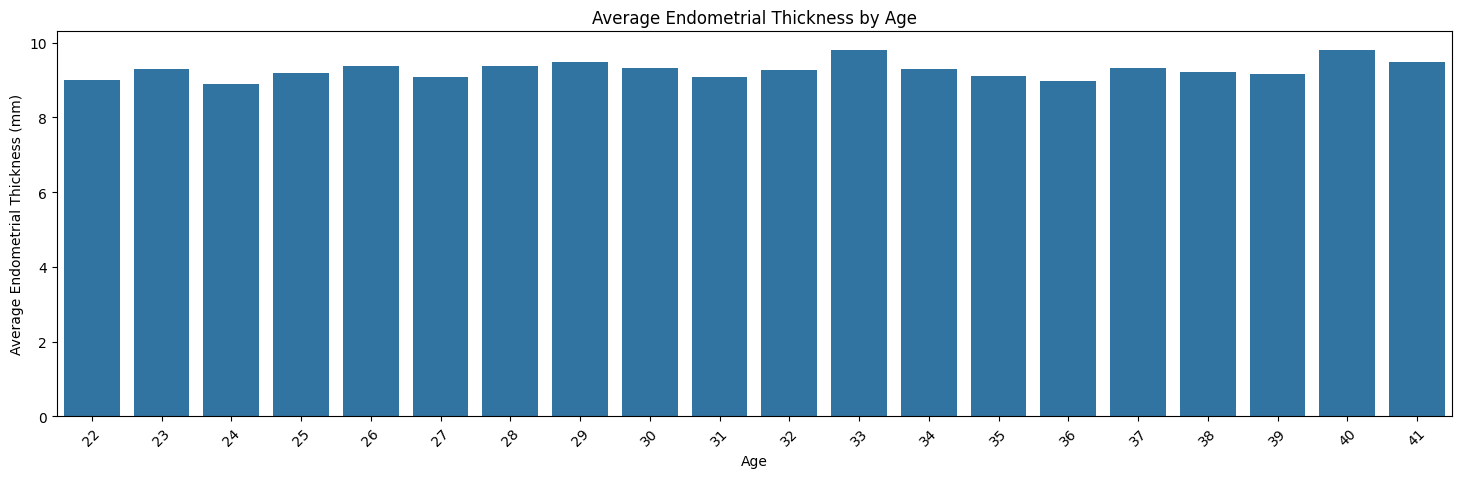

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Grouping by age and calculating average thickness
age_avg = df.groupby('Age')['Endometrial_Thickness_mm'].mean().reset_index()

plt.figure(figsize=(18, 5))
sns.barplot(data=age_avg, x='Age', y='Endometrial_Thickness_mm')

plt.title('Average Endometrial Thickness by Age')
plt.xlabel('Age')
plt.ylabel('Average Endometrial Thickness (mm)')
plt.xticks(rotation=45)  # rotate x labels if needed

plt.show()


In [ ]:
df.head()

,Age,BMI,FSH,LH,E2,P4,Embryo_Grade,Day_of_Development,Endometrial_Thickness_mm,Blood_Flow_Score,Days_Since_Progesterone_Start,E2/FSH,P4/E2,Implantation_Success
0,28,18.7,5.51,9.43,1102.5,15.84,4BB,D6,12.5,Fair,6,200.09,0.0144,1
1,41,27.4,4.90,2.49,1913.6,10.44,4AB,D6,8.7,Poor,3,390.53,0.0055,1
2,36,20.0,11.62,2.74,985.2,6.35,3BB,D5,10.0,Fair,4,84.78,0.0064,0
3,32,23.3,3.08,3.30,3001.2,3.45,4AB,D6,6.7,Fair,6,974.42,0.0011,0
4,29,27.2,11.98,6.76,3684.9,6.05,4BB,D5,9.0,Fair,5,307.59,0.0016,1


In [ ]:
x=df.drop('Implantation_Success',axis=1)

In [ ]:
y=df.drop('Implantation_Success',axis=1)

Applying Machine Learning Algorithm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your data
df = pd.read_excel("implantIQ_synthetic_dataset.xlsx")

# Clean up Embryo_Grade column
df = pd.get_dummies(df, columns=['Embryo_Grade'], drop_first=True)

# Drop any remaining string/object columns (if any)
df = df.select_dtypes(exclude=['object'])

# Define target and features
y = df['Implantation_Success']
x = df.drop(columns=['Implantation_Success'])

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)





RandomForestClassifier()

In [ ]:
y_pred_rf= rf.predict(x_test)
y_pred_rf

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rf)*100

65.83333333333333

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your data
df = pd.read_excel("implantIQ_synthetic_dataset.xlsx")

# Clean up Embryo_Grade column
df = pd.get_dummies(df, columns=['Embryo_Grade'], drop_first=True)

# Drop any remaining string/object columns (if any)
df = df.select_dtypes(exclude=['object'])

# Define target and features
y = df['Implantation_Success']
x = df.drop(columns=['Implantation_Success'])

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train model
lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [ ]:
y_pred_lr= lr.predict(x_test)
y_pred_lr

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)*100

62.5


📊 XGBoost Evaluation Metrics
Accuracy: 64.58%
Precision: 0.64
Recall: 0.64
F1-score: 0.64
ROC AUC: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65       122
           1       0.64      0.64      0.64       118

    accuracy                           0.65       240
   macro avg       0.65      0.65      0.65       240
weighted avg       0.65      0.65      0.65       240


🔍 SHAP Feature Importance:


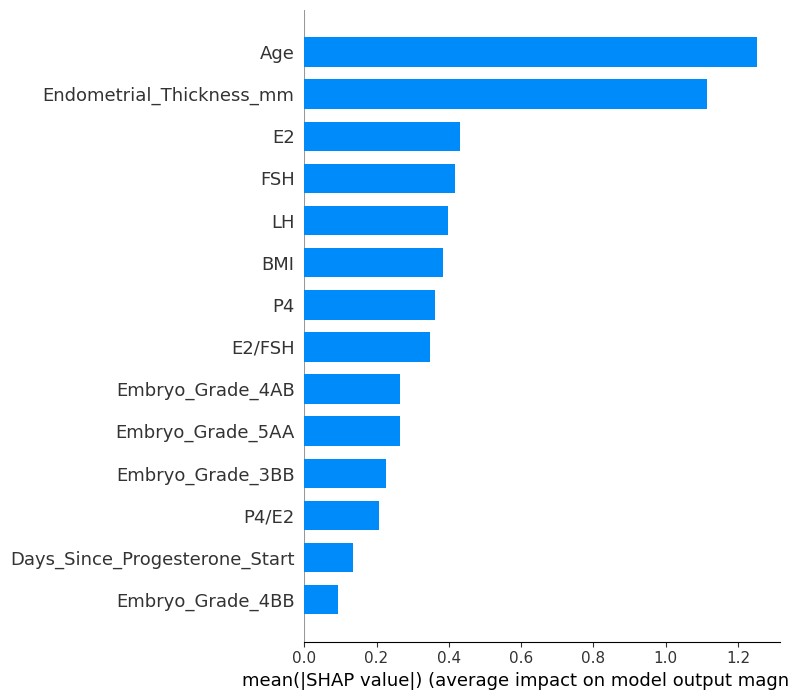

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
)
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt
y = df['Implantation_Success']
X = df.drop(columns=['Implantation_Success'])

# === Scale features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# === Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# === Train XGBoost Model ===
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# === Predict ===
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

# === Evaluation ===
print("\n📊 XGBoost Evaluation Metrics")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1-score:", round(f1_score(y_test, y_pred), 2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === SHAP Explainability ===
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_scaled_df)

print("\n🔍 SHAP Feature Importance:")
shap.summary_plot(shap_values, X_scaled_df, plot_type="bar", show=True)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best F1 Score on CV:", grid.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score on CV: 0.7219536279510302


In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.0 MB/s eta 0:00:00


app.py

In [ ]:
# Install necessary packages
!pip install streamlit pyngrok --quiet

In [ ]:
import streamlit as st

# --- Predictor Function ---
def predict_implantation(age, bmi, day_of_transfer, prev_ivf, endometrium, embryo_grade):
    prob = 0.75  # baseline
    reasons = []

    # Age effect
    if age > 37:
        prob -= 0.15
        reasons.append("Advanced maternal age (>37 years)")
    elif age < 25:
        prob -= 0.05
        reasons.append("Very young maternal age (<25 years)")

    # BMI effect
    if bmi > 30:
        prob -= 0.1
        reasons.append("High BMI (>30)")
    elif bmi < 18:
        prob -= 0.1
        reasons.append("Low BMI (<18)")

    # Previous IVF attempts
    if prev_ivf >= 3:
        prob -= 0.1
        reasons.append("Multiple previous failed IVF attempts (≥3)")

    # Endometrial thickness
    if endometrium < 7:
        prob -= 0.1
        reasons.append("Thin endometrium (<7 mm)")

    # Embryo grade
    if embryo_grade.upper() != "A":
        prob -= 0.1
        reasons.append(f"Embryo grade {embryo_grade} (lower than A)")

    # Day of transfer
    if day_of_transfer not in [5, 6]:
        prob -= 0.05
        reasons.append("Transfer before blastocyst stage (Day 3)")

    # Clamp between 5% and 95%
    prob = max(0.05, min(prob, 0.95))

    # Convert to percentage
    return round(prob * 100, 1), reasons


# --- Streamlit UI ---
st.title("👶 Personalized Embryo Implantation Predictor (Prototype)")
st.write("⚠️ This is a **prototype research app**, not a medical device. Probabilities are illustrative only.")

# Inputs
age = st.number_input("Age of patient", min_value=18, max_value=50, value=32)
bmi = st.number_input("Body Mass Index (BMI)", min_value=15.0, max_value=45.0, value=22.0)
day_of_transfer = st.selectbox("Day of Embryo Transfer", [3, 5, 6])
prev_ivf = st.number_input("Previous IVF attempts", min_value=0, max_value=10, value=0)
endometrium = st.number_input("Endometrial thickness (mm)", min_value=4.0, max_value=20.0, value=9.0)
embryo_grade = st.selectbox("Embryo grade", ["A", "B", "C", "D"])

# Prediction
if st.button("Predict Implantation Probability"):
    prob_percent, reasons = predict_implantation(age, bmi, day_of_transfer, prev_ivf, endometrium, embryo_grade)

    st.subheader(f"🧪 Predicted Implantation Probability: {prob_percent}%")

    if prob_percent >= 70:
        st.success("✅ High probability (prototype estimate).")
    elif 50 <= prob_percent < 70:
        st.warning("🩺 Moderate probability (prototype estimate).")
    else:
        st.error("⚠️ Low probability (prototype estimate).")
        if reasons:
            st.markdown("### 🔎 Possible reasons for lower probability:")
            for r in reasons:
                st.write(f"- {r}")


2025-08-27 04:30:39.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 04:30:39.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 04:30:39.592 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 04:30:39.593 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 04:30:39.594 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 04:30:39.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 04:30:39.598 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 04:30:39.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Finally App

https://icaxdwuxz4sqsys46mw5rr.streamlit.app/